In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Diabetes.csv to Diabetes (1).csv


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("Diabetes.csv")
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# diabetes sütunu incelemesi
class_counts = df["Diabetes"].value_counts()
class_ratio = class_counts[1] / class_counts[0]
print(class_ratio)

0.536


In [ ]:
class_counts[1]

268

In [ ]:
class_counts[0]

500

In [ ]:
# korelasyon matrisi
corr_matrix = df.corr()
print(corr_matrix)

               Pregnancies   Glucose        BP  SkinThickness   Insulin  \
Pregnancies       1.000000  0.129459  0.141282      -0.081672 -0.073535   
Glucose           0.129459  1.000000  0.152590       0.057328  0.331357   
BP                0.141282  0.152590  1.000000       0.207371  0.088933   
SkinThickness    -0.081672  0.057328  0.207371       1.000000  0.436783   
Insulin          -0.073535  0.331357  0.088933       0.436783  1.000000   
BMI               0.017683  0.221071  0.281805       0.392573  0.197859   
PedigreeFunc     -0.033523  0.137337  0.041265       0.183928  0.185071   
Age               0.544341  0.263514  0.239528      -0.113970 -0.042163   
Diabetes          0.221898  0.466581  0.065068       0.074752  0.130548   

                    BMI  PedigreeFunc       Age  Diabetes  
Pregnancies    0.017683     -0.033523  0.544341  0.221898  
Glucose        0.221071      0.137337  0.263514  0.466581  
BP             0.281805      0.041265  0.239528  0.065068  
SkinThick

In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFunc     0
Age              0
Diabetes         0
dtype: int64


In [ ]:
import numpy as np

# Pregnancies ve Diabetes sütunları hariç diğer sütunların 0 değerlerini NaN ile değiştirme
df[df.columns.difference(["Pregnancies","Diabetes"])] = df[df.columns.difference(["Pregnancies","Diabetes"])].replace(0,np.nan)
# eksik veri sayısı
missing_data = df.isnull().sum()
print(missing_data)

Pregnancies        0
Glucose            5
BP                35
SkinThickness    227
Insulin          374
BMI               11
PedigreeFunc       0
Age                0
Diabetes           0
dtype: int64


In [ ]:
missing_data_percent = df.isnull().mean()*100
print(missing_data_percent)

Pregnancies       0.000000
Glucose           0.651042
BP                4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
PedigreeFunc      0.000000
Age               0.000000
Diabetes          0.000000
dtype: float64


In [ ]:
# aykırı değerleri hesaplayın
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = (Q1 - 1.5 * IQR) 
outlier_threshold = outlier_threshold.where(~np.isnan(outlier_threshold), df.median())

# aykırı değerleri göster
outliers = df[~((df < outlier_threshold) | (df > outlier_threshold)).any(axis=1)]
print(outliers)

Empty DataFrame
Columns: [Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, PedigreeFunc, Age, Diabetes]
Index: []


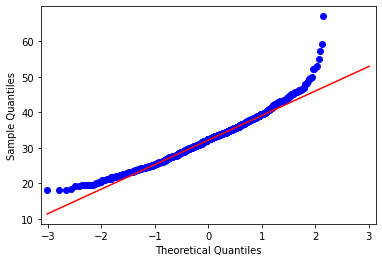

In [ ]:
import statsmodels.api as sm
import pylab as py

sm.qqplot(df['BMI'], line ='q')
py.show()


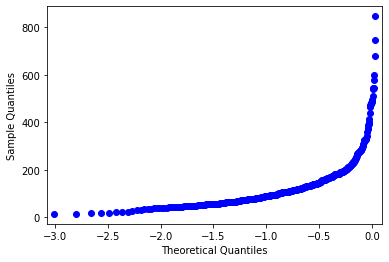

In [ ]:
sm.qqplot(df['Insulin'], line =None)
py.show()

In [ ]:
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


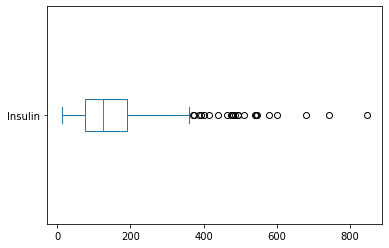

In [ ]:
df['Insulin'].plot(kind='box', vert=False);

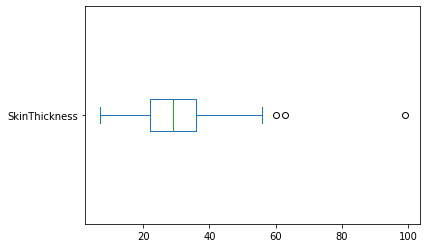

In [ ]:

df['SkinThickness'].plot(kind='box', vert=False);

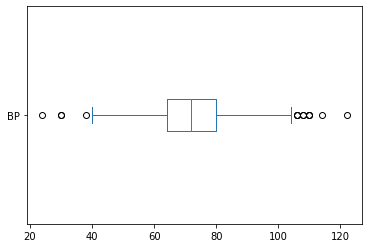

In [ ]:
df['BP'].plot(kind='box', vert=False);

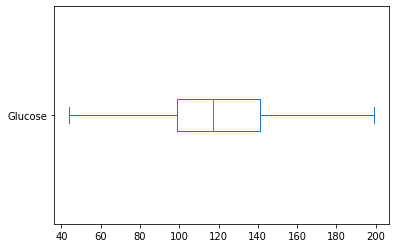

In [ ]:
df['Glucose'].plot(kind='box', vert=False);

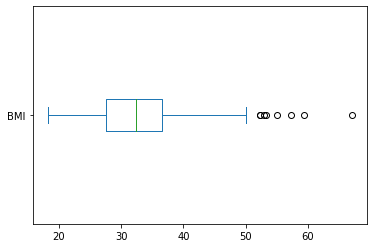

In [ ]:
df['BMI'].plot(kind='box', vert=False);

In [ ]:
df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Glucose'] = df['Glucose'].replace(np.nan, df['Glucose'].mean())

df['BP'] = df['BP'].replace(np.nan, df['BP'].mean())

df['BMI'] = df['BMI'].replace(np.nan, df['BMI'].median())

df['SkinThickness'] = df['SkinThickness'].replace(np.nan, df['SkinThickness'].median())

df['Insulin'] = df['Insulin'].replace(np.nan, df['Insulin'].median())

In [ ]:
df.isnull().sum()


Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFunc     0
Age              0
Diabetes         0
dtype: int64

In [ ]:
df.describe()


,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


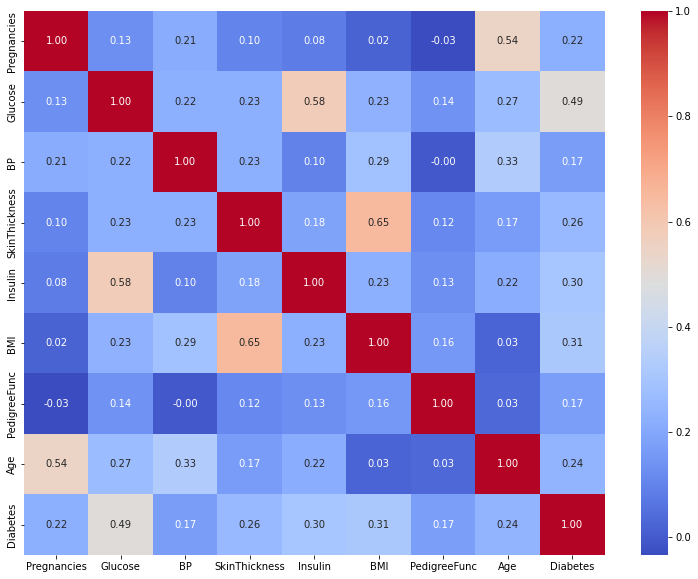

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

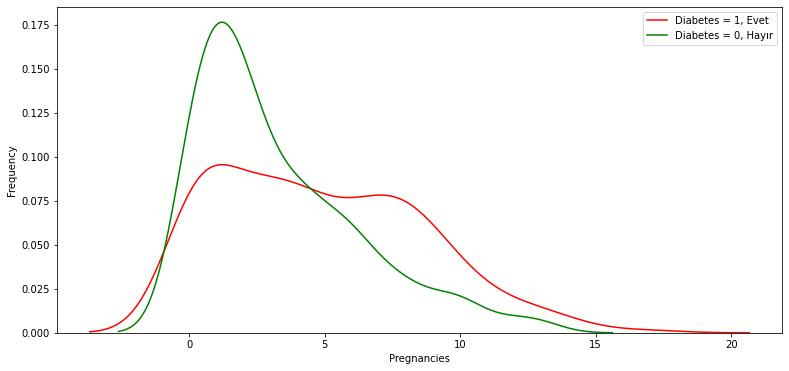

In [ ]:
# Pregnancies özniteliğinin Diabetes üzerindeki etkisi
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Diabetes"] == 1], 
     color="Red", shade = False)
g = sns.kdeplot(df["Pregnancies"][df["Diabetes"] == 0], 
     ax =g, color="Green", shade= False)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Diabetes = 1, Evet","Diabetes = 0, Hayır"])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


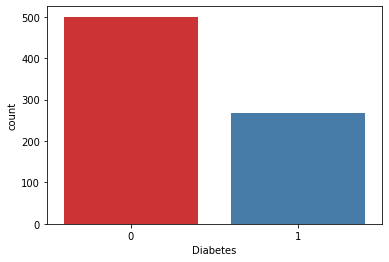

In [ ]:
sns.countplot('Diabetes', data = df, palette = "Set1")


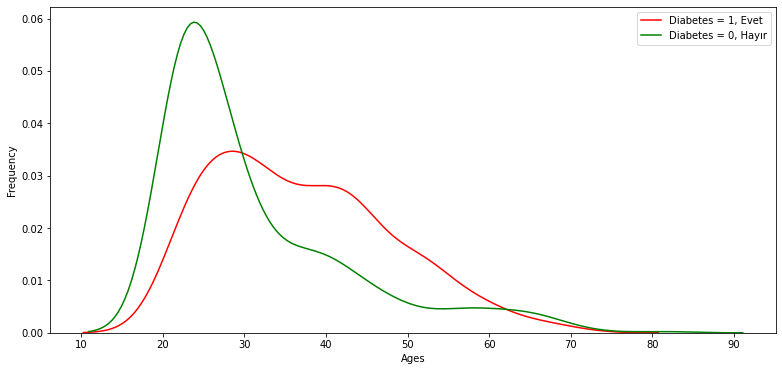

In [ ]:
# Age özniteliğinin Diabetes üzerindeki etkisi
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Age"][df["Diabetes"] == 1], 
     color="Red", shade = False)
g = sns.kdeplot(df["Age"][df["Diabetes"] == 0], 
     ax =g, color="Green", shade= False)
g.set_xlabel("Ages")
g.set_ylabel("Frequency")
g.legend(["Diabetes = 1, Evet","Diabetes = 0, Hayır"])


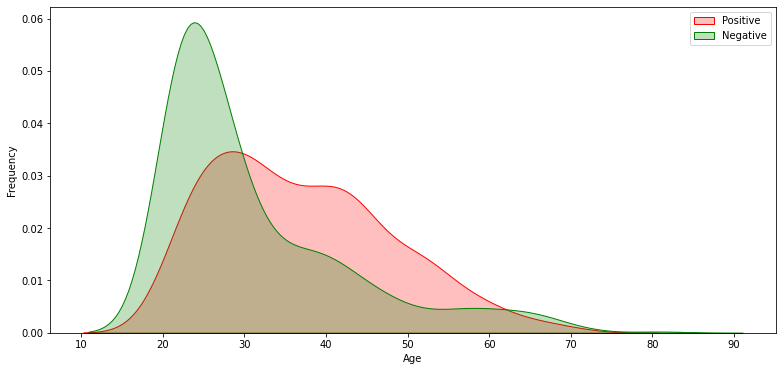

In [ ]:
# Explore Glucose vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Age"][df["Diabetes"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Age"][df["Diabetes"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

In [ ]:
# Glucose vs BMI vs Age

plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Pregnancies", y="Diabetes", hue="Age", size="Age")

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies       5.0000
Glucose          40.5000
BP               16.0000
SkinThickness     7.0000
Insulin           5.7500
BMI               9.1000
PedigreeFunc      0.3825
Age              17.0000
Diabetes          1.0000
dtype: float64


In [ ]:
df_ceyreklik_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_ceyreklik_out.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Diabetes
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.000000,29.0,125.0,30.1,0.349,47,1


In [ ]:
df_ceyreklik_out.Pregnancies.describe()


count    375.000000
mean       4.333333
std        3.331639
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       13.000000
Name: Pregnancies, dtype: float64

In [ ]:
# korelasyon matrisi
kor_matrix = df.corr()
print(kor_matrix)

               Pregnancies   Glucose        BP  SkinThickness   Insulin  \
Pregnancies       1.000000  0.127911  0.208522       0.081770  0.025047   
Glucose           0.127911  1.000000  0.218367       0.192686  0.419064   
BP                0.208522  0.218367  1.000000       0.191853  0.045087   
SkinThickness     0.081770  0.192686  0.191853       1.000000  0.155610   
Insulin           0.025047  0.419064  0.045087       0.155610  1.000000   
BMI               0.021559  0.231128  0.281199       0.543205  0.180241   
PedigreeFunc     -0.033523  0.137060 -0.002763       0.102188  0.126503   
Age               0.544341  0.266534  0.324595       0.126107  0.097101   
Diabetes          0.221898  0.492928  0.166074       0.214873  0.203790   

                    BMI  PedigreeFunc       Age  Diabetes  
Pregnancies    0.021559     -0.033523  0.544341  0.221898  
Glucose        0.231128      0.137060  0.266534  0.492928  
BP             0.281199     -0.002763  0.324595  0.166074  
SkinThick

In [ ]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BP,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
PedigreeFunc,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [ ]:
# Normalizasyon : Min-Max
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_normalizasyon = sc.fit_transform(df)
df_normalizasyon = pd.DataFrame(df_normalizasyon)


In [ ]:
# öznitelik seçimi - [Pregnancies, Age]
X = df_normalizasyon.iloc[:, [0, 7]].values
Y = df_normalizasyon.iloc[:, 8].values

array([[0.35294118, 0.48333333],
       [0.05882353, 0.16666667],
       [0.47058824, 0.18333333],
       ...,
       [0.29411765, 0.15      ],
       [0.05882353, 0.43333333],
       [0.05882353, 0.03333333]])

In [ ]:
# test train x y ayırma test kümesi boyutu %30
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42, stratify = df['Diabetes'] )


In [ ]:

# boyut
print("X_train boyutu ", X_train.shape)
print("X_test boyutu ", X_test.shape)
print("Y_train boyutu ", Y_train.shape)
print("Y_test boyutu ", Y_test.shape)

X_train boyutu  (537, 2)
X_test boyutu  (231, 2)
Y_train boyutu  (537,)
Y_test boyutu  (231,)


In [ ]:
# Random forest, 100 ağaç 
from sklearn.ensemble import RandomForestClassifier
rf_siniflandi = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf_siniflandi.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
Y_rf_tahmin = rf_siniflandi.predict(X_test)


In [ ]:
# Evaluating using accuracy_score metric

#accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
#accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)



In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_rf = accuracy_score(Y_test, Y_rf_tahmin)

In [ ]:
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))


In [ ]:
print("Random Forest ACC - " + str(accuracy_rf * 100))

Random Forest ACC - 61.904761904761905


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_rf_tahmin))

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       150
         1.0       0.45      0.37      0.41        81

    accuracy                           0.62       231
   macro avg       0.57      0.56      0.56       231
weighted avg       0.60      0.62      0.61       231



In [ ]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFunc     0
Age              0
Diabetes         0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Gaussian Bayes sınıflandırma
clf = GaussianNB()

# eğitim
clf.fit(X_train, Y_train)

# test
y_tahmin = clf.predict(X_test)

# performans metrikleri
print("Accuracy:", metrics.accuracy_score(Y_test, y_tahmin))
print("Precision:", metrics.precision_score(Y_test, y_tahmin))
print("Recall:", metrics.recall_score(Y_test, y_tahmin))

Accuracy: 0.670995670995671
Precision: 0.5510204081632653
Recall: 0.3333333333333333


In [ ]:
print("Bayes Sınıflama Performansı:")
print("Accuracy - ", metrics.accuracy_score(Y_test, y_tahmin)*100)
print("Precision - ", metrics.precision_score(Y_test, y_tahmin)*100)
print("Recall - ", metrics.recall_score(Y_test, y_tahmin)*100)

Bayes Sınıflama Performansı:
Accuracy -  67.09956709956711
Precision -  55.10204081632652
Recall -  33.33333333333333


In [ ]:
print("Random Forest Sınıflama Performansı:")
print("Accuracy - ", metrics.accuracy_score(Y_test, Y_rf_tahmin)*100)
print("Precision - ", metrics.precision_score(Y_test, Y_rf_tahmin)*100)
print("Recall - ", metrics.recall_score(Y_test, Y_rf_tahmin)*100)

Random Forest Sınıflama Performansı:
Accuracy -  61.904761904761905
Precision -  44.776119402985074
Recall -  37.03703703703704


In [ ]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred_nb = nb.predict(X_test)


In [ ]:
# Evaluating using accuracy_score metric

accuracy_nb = accuracy_score(Y_test, Y_pred_nb)

In [ ]:
print("Naive Bayes: " + str(accuracy_nb * 100))


Naive Bayes: 67.09956709956711


In [ ]:
print("Random Forest: " + str(accuracy_rf * 100))

Random Forest: 61.904761904761905


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Veri kümenizi eğitim ve test verilerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# C4.5 yapısını kullanarak sınıflandırıcı oluşturun
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=0, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# Sınıflandırıcıyı eğitin
clf.fit(X_train, y_train)

# Test verileri kullanarak tahmin yapın
y_pred = clf.predict(X_test)

# Başarı oranını hesaplayın
accuracy = accuracy_score(y_test, y_pred)
print("C4.5 yapısının sınıflama başarısı: ", accuracy)

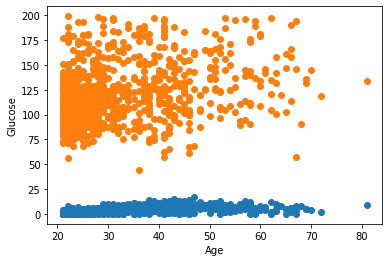

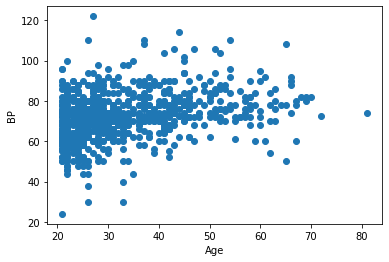

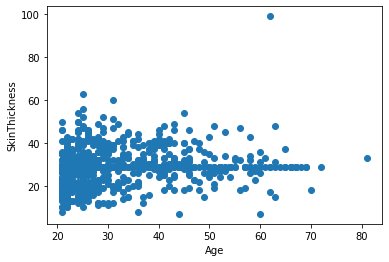

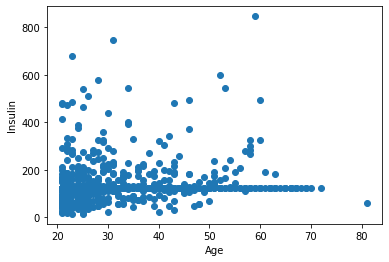

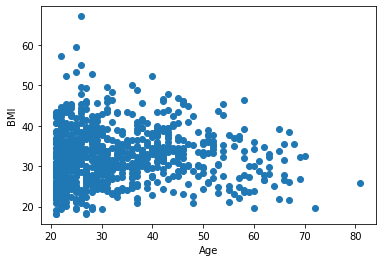

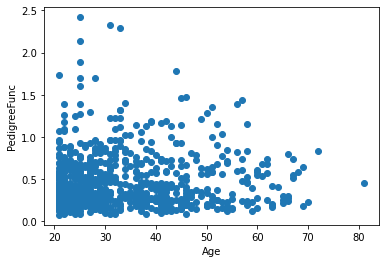

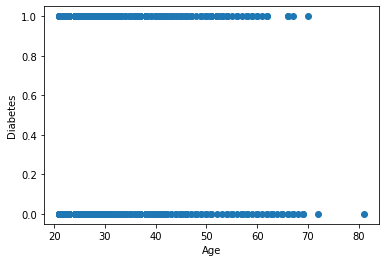

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# scatter plot oluştur
plt.scatter(df["Age"], df["Pregnancies"])

# x ve y eksenleri etiketleri
plt.xlabel("Age")
plt.ylabel("Pregnancies")

# scatter plot oluştur
for column in df.columns:
    if column not in ['Age', 'Pregnancies']:
        plt.scatter(df["Age"], df[column])
        plt.xlabel("Age")
        plt.ylabel(column)
        plt.show()

In [ ]:
# korelasyon matrisi oluşturun
corr_matrix = df.corr()
print(corr_matrix)


               Pregnancies   Glucose        BP  SkinThickness   Insulin  \
Pregnancies       1.000000  0.127911  0.208522       0.081770  0.025047   
Glucose           0.127911  1.000000  0.218367       0.192686  0.419064   
BP                0.208522  0.218367  1.000000       0.191853  0.045087   
SkinThickness     0.081770  0.192686  0.191853       1.000000  0.155610   
Insulin           0.025047  0.419064  0.045087       0.155610  1.000000   
BMI               0.021559  0.231128  0.281199       0.543205  0.180241   
PedigreeFunc     -0.033523  0.137060 -0.002763       0.102188  0.126503   
Age               0.544341  0.266534  0.324595       0.126107  0.097101   
Diabetes          0.221898  0.492928  0.166074       0.214873  0.203790   

                    BMI  PedigreeFunc       Age  Diabetes  
Pregnancies    0.021559     -0.033523  0.544341  0.221898  
Glucose        0.231128      0.137060  0.266534  0.492928  
BP             0.281199     -0.002763  0.324595  0.166074  
SkinThick

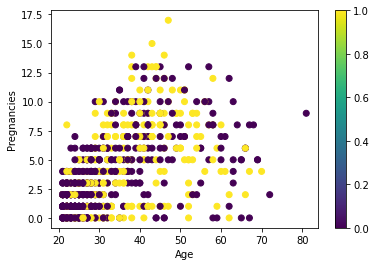

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# scatter plot oluştur
plt.scatter(df["Age"], df["Pregnancies"], c=df["Diabetes"], cmap='viridis')

# x ve y eksenleri etiketleri
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.colorbar()
# görseli göster
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)